In [1]:
import numpy as np
from numpy.linalg import eig
from qiskit_algorithms.optimizers import SLSQP
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit.primitives import Estimator
from qiskit_algorithms import VQE
from qiskit.quantum_info import Operator
from qiskit.quantum_info import SparsePauliOp

### The goal of the exercise is to use quantum computer to find minimal eigenvalue of Hamiltonian. This naturally can be used to find ground state of quantum mechanical systems - like molecules.

# Let's define the operator:

In [2]:
hamiltonian = SparsePauliOp.from_list(
    [("YZ", 0.3980), ("ZI", -0.3980), ("ZZ", -0.0113), ("XX", 0.1810)]
)

In [3]:
H = hamiltonian.to_matrix()
print(H)

[[-0.4093+0.j     0.    +0.j     0.    -0.398j  0.181 +0.j   ]
 [ 0.    +0.j    -0.3867+0.j     0.181 +0.j     0.    +0.398j]
 [ 0.    +0.398j  0.181 +0.j     0.4093+0.j     0.    +0.j   ]
 [ 0.181 +0.j     0.    -0.398j  0.    +0.j     0.3867+0.j   ]]


In [4]:
hamiltonian_operator = Operator(hamiltonian)
hamiltonian_operator.draw(output='latex')

<IPython.core.display.Latex object>

# Let's find eigenvalues using classical numpy linear algebra package:

In [5]:
e,v=eig(H)
print("Eigenvalues:", e)
print("Eigenvectors:\n", v)

Eigenvalues: [-0.70293039+6.24707871e-18j -0.45308083-7.57079461e-17j
  0.70293039-6.06797210e-18j  0.45308083+3.47628378e-17j]
Eigenvectors:
 [[ 6.49638715e-01+0.00000000e+00j -1.13885050e-18+6.65864932e-01j
   7.01111754e-18-3.30320834e-01j -1.59629506e-01-4.32331142e-17j]
 [-2.91446790e-16+6.01307531e-01j  7.03606721e-01+0.00000000e+00j
   3.27546851e-01-2.90500924e-17j -2.28717515e-17+1.89947086e-01j]
 [-3.02255009e-17-3.30320834e-01j  1.59629506e-01+8.31587415e-17j
   6.49638715e-01+0.00000000e+00j  1.18760305e-16-6.65864932e-01j]
 [-3.27546851e-01-1.37383111e-16j -1.35473761e-17+1.89947086e-01j
  -1.69472202e-17-6.01307531e-01j  7.03606721e-01+0.00000000e+00j]]


# ...or even find smallest eigenvalue with Qiskit wrapper over classical numpy eigensolver:

In [6]:
from qiskit_algorithms import NumPyMinimumEigensolver

numpy_solver = NumPyMinimumEigensolver()
result = numpy_solver.compute_minimum_eigenvalue(operator=hamiltonian)
minimal_eigenvalue = result.eigenvalue.real
print(minimal_eigenvalue)

-0.702930394459531


# Now, let's use Estimator to calculate expectation value of the operator for random choise of parameters:

In [7]:
ansatz = EfficientSU2(hamiltonian.num_qubits)

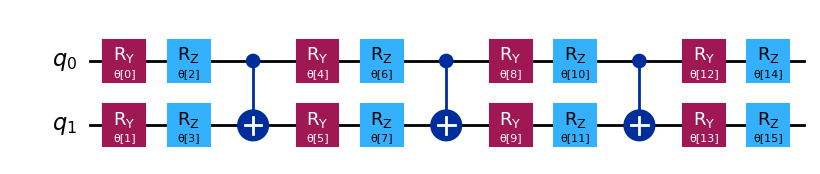

In [8]:
ansatz.decompose().draw("mpl")

In [9]:
num_params = ansatz.num_parameters
print(num_params)

16


In [10]:
print(hamiltonian.num_qubits)

2


In [16]:
estimator = Estimator()
initial_parameters = 2 * np.pi * np.random.random(num_params)
minimal_eigenvalue=estimator.run(ansatz, hamiltonian, parameter_values=initial_parameters).result().values[0]
print(minimal_eigenvalue)

0.209131561773395


You can run the above cell several times to randomly choose set of parameters and calculate the corresponding expectation value of the Hamiltonian in the quantum state corresponding to the parametrized ansatz (energy).

# Now let's use VQE algorithm to find values of parameters corresponding to the minimal expectation value of our operator and this minimal value itself (groud state energy):

In [17]:
optimizer = SLSQP(maxiter=1000)

In [18]:
vqe = VQE(estimator, ansatz, optimizer)

In [19]:
result = vqe.compute_minimum_eigenvalue(hamiltonian)
print(result)

{   'aux_operators_evaluated': None,
    'cost_function_evals': 170,
    'eigenvalue': -0.7029293957772695,
    'optimal_circuit': <qiskit.circuit.library.n_local.efficient_su2.EfficientSU2 object at 0x000001C8D9CAA810>,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): -0.3669748517507131,
                              ParameterVectorElement(θ[2]): 0.4516397536007124,
                              ParameterVectorElement(θ[1]): 0.3562617135700139,
                              ParameterVectorElement(θ[3]): 2.774249866896796,
                              ParameterVectorElement(θ[4]): 1.4116100152603723,
                              ParameterVectorElement(θ[5]): -1.6575396229141246,
                              ParameterVectorElement(θ[6]): 2.5222872131398284,
                              ParameterVectorElement(θ[7]): 3.0126951042834036,
                              ParameterVectorElement(θ[8]): 0.1250294863739623,
                              ParameterVectorElement(θ[9])

The idea of using quantum computer here is that using $n$ qubits we can find eigenvalues of matices with size $2^n$, so potentially we can simulate much larger quatum systems that with classical computers which will break very quickly on the $2^n$ scale.

# Exercise 1
Change the ansatz to the below one, visualize it and check how if the eigenvalue is still correctly found:

In [157]:
new_ansatz = TwoLocal(num_qubits, "ry", "cz")

# Exercise 2:
Using VQE algorithm calculate ground state energy of hydrogen molecule described by the below Hamiltonian.\
Use the first ansatz we used above - not the one from Exercise 1 ;)\
Is the result correct?

In [153]:
H2_op = SparsePauliOp.from_list(
    [
        ("II", -1.052373245772859),
        ("IZ", 0.39793742484318045),
        ("ZI", -0.39793742484318045),
        ("ZZ", -0.01128010425623538),
        ("XX", 0.18093119978423156),
    ]
)

# Proposition for the evening ;)

Run the VQE algorithm finding groud state energy of $H_2$ molecule on real quantum computer.\
Check how the minimal eigenvalue differs from the one obtained on simulator.

For references and to read more, you can explore the tutorials in Qiskit documentation - like this one:\
https://qiskit-community.github.io/qiskit-algorithms/tutorials/03_vqe_simulation_with_noise.html